In [72]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import kendalltau, pearsonr

In [107]:
country = "Chile"
year = 2021
geography = "commune"
method = "er"

In [108]:
df_transition = pd.read_csv(f"data_transition/{country}_{year}_{geography}_expanded.csv", encoding="latin-1")
df_transition.head()

,Unnamed: 0,GABRIEL.BORIC.FONT.GABRIEL.BORIC.FONT,JOSE.ANTONIO.KAST.RIST.GABRIEL.BORIC.FONT,YASNA.PROVOSTE.CAMPILLAY.GABRIEL.BORIC.FONT,SEBASTIAN.SICHEL.RAMIREZ.GABRIEL.BORIC.FONT,EDUARDO.ARTES.BRICHETTI.GABRIEL.BORIC.FONT,MARCO.ENRIQUEZ.OMINAMI.GUMUCIO.GABRIEL.BORIC.FONT,FRANCO.PARISI.FERNANDEZ.GABRIEL.BORIC.FONT,GABRIEL.BORIC.FONT.JOSE.ANTONIO.KAST.RIST,JOSE.ANTONIO.KAST.RIST.JOSE.ANTONIO.KAST.RIST,YASNA.PROVOSTE.CAMPILLAY.JOSE.ANTONIO.KAST.RIST,SEBASTIAN.SICHEL.RAMIREZ.JOSE.ANTONIO.KAST.RIST,EDUARDO.ARTES.BRICHETTI.JOSE.ANTONIO.KAST.RIST,MARCO.ENRIQUEZ.OMINAMI.GUMUCIO.JOSE.ANTONIO.KAST.RIST,FRANCO.PARISI.FERNANDEZ.JOSE.ANTONIO.KAST.RIST,commune
0,1,0.949742,0.020852,0.686724,0.264877,0.963423,0.985241,0.540324,0,0.978836,0.301988,0.713375,0.0,0,0.448470,ALGARROBO
1,2,1.000000,0.079119,0.832955,0.288541,0.981943,1.000000,0.571258,0,0.920744,0.166022,0.693565,0.0,0,0.424457,ALHUE
2,3,0.984204,0.063628,0.667072,0.256645,0.940064,0.996687,0.491406,0,0.935006,0.325642,0.722917,0.0,0,0.488495,ALTO BIOBIO
3,4,1.000000,0.072102,0.752323,0.266277,0.959988,0.997986,0.513345,0,0.926892,0.246872,0.714400,0.0,0,0.470104,ALTO DEL CARMEN
4,5,0.981200,0.045763,0.736997,0.254210,0.968298,0.989975,0.478302,0,0.953692,0.256739,0.727473,0.0,0,0.512784,ALTO HOSPICIO


In [110]:
df_dv = pd.read_csv(f"data_output/{country}/{year}_divisiveness_{geography}_{method}.csv.gz", compression="gzip")
df_dv = df_dv.dropna()
df_dv.head()

,value,candidate,commune
0,11.105422,FRANCO PARISI FERNANDEZ,ALGARROBO
1,24.419684,FRANCO PARISI FERNANDEZ,ALHUE
2,21.993919,FRANCO PARISI FERNANDEZ,ALTO BIOBIO
3,29.460149,FRANCO PARISI FERNANDEZ,ALTO DEL CARMEN
4,27.546444,FRANCO PARISI FERNANDEZ,ALTO HOSPICIO


In [111]:
df_location = pd.read_csv(f"data_output/{country}/{year}_first_round_location.csv.gz", compression="gzip")
df_location.head()

,polling_id,region_id,region,province,senate_district,district,commune,electoral_circ,polling_place,polling_table,polling_type,mixed_polling,voters
0,ALTO HOSPICIO-ALTO HOSPICIO-ANEXO DE COLEGIO S...,1,DE TARAPACA,IQUIQUE,2,2,ALTO HOSPICIO,ALTO HOSPICIO,ANEXO DE COLEGIO SAN ANTONIO DE MATILLA,20,M,20M,333
1,ALTO HOSPICIO-ALTO HOSPICIO-ANEXO DE COLEGIO S...,1,DE TARAPACA,IQUIQUE,2,2,ALTO HOSPICIO,ALTO HOSPICIO,ANEXO DE COLEGIO SAN ANTONIO DE MATILLA,21,M,21M,340
2,ALTO HOSPICIO-ALTO HOSPICIO-ANEXO DE COLEGIO S...,1,DE TARAPACA,IQUIQUE,2,2,ALTO HOSPICIO,ALTO HOSPICIO,ANEXO DE COLEGIO SAN ANTONIO DE MATILLA,22,M,22M,341
3,ALTO HOSPICIO-ALTO HOSPICIO-ANEXO DE COLEGIO S...,1,DE TARAPACA,IQUIQUE,2,2,ALTO HOSPICIO,ALTO HOSPICIO,ANEXO DE COLEGIO SAN ANTONIO DE MATILLA,23,M,23M,344
4,ALTO HOSPICIO-ALTO HOSPICIO-ANEXO DE COLEGIO S...,1,DE TARAPACA,IQUIQUE,2,2,ALTO HOSPICIO,ALTO HOSPICIO,ANEXO DE COLEGIO SAN ANTONIO DE MATILLA,24,M,24M,342


In [112]:
df_fround = pd.read_csv(f"data_output/{country}/{year}_first_round.csv.gz", compression="gzip")
df_fround = pd.merge(df_fround, df_location[["polling_id", geography]], on="polling_id")
df_fround = df_fround.groupby([geography, "candidate"]).agg({"value": "sum"})
df_fround["rate"] = df_fround.groupby(level=[0]).apply(lambda x: x/x.sum())
df_fround = df_fround.reset_index()
df_fround.head()

,commune,candidate,value,rate
0,ALGARROBO,EDUARDO ARTES BRICHETTI,90.0,0.011038
1,ALGARROBO,FRANCO PARISI FERNANDEZ,568.0,0.069659
2,ALGARROBO,GABRIEL BORIC FONT,1978.0,0.242580
3,ALGARROBO,JOSE ANTONIO KAST RIST,2877.0,0.352833
4,ALGARROBO,MARCO ENRIQUEZ-OMINAMI GUMUCIO,472.0,0.057886


In [113]:
df = pd.merge(df_dv, df_transition, on=geography)
df.head()

,value,candidate,commune,Unnamed: 0,GABRIEL.BORIC.FONT.GABRIEL.BORIC.FONT,JOSE.ANTONIO.KAST.RIST.GABRIEL.BORIC.FONT,YASNA.PROVOSTE.CAMPILLAY.GABRIEL.BORIC.FONT,SEBASTIAN.SICHEL.RAMIREZ.GABRIEL.BORIC.FONT,EDUARDO.ARTES.BRICHETTI.GABRIEL.BORIC.FONT,MARCO.ENRIQUEZ.OMINAMI.GUMUCIO.GABRIEL.BORIC.FONT,FRANCO.PARISI.FERNANDEZ.GABRIEL.BORIC.FONT,GABRIEL.BORIC.FONT.JOSE.ANTONIO.KAST.RIST,JOSE.ANTONIO.KAST.RIST.JOSE.ANTONIO.KAST.RIST,YASNA.PROVOSTE.CAMPILLAY.JOSE.ANTONIO.KAST.RIST,SEBASTIAN.SICHEL.RAMIREZ.JOSE.ANTONIO.KAST.RIST,EDUARDO.ARTES.BRICHETTI.JOSE.ANTONIO.KAST.RIST,MARCO.ENRIQUEZ.OMINAMI.GUMUCIO.JOSE.ANTONIO.KAST.RIST,FRANCO.PARISI.FERNANDEZ.JOSE.ANTONIO.KAST.RIST
0,11.105422,FRANCO PARISI FERNANDEZ,ALGARROBO,1,0.949742,0.020852,0.686724,0.264877,0.963423,0.985241,0.540324,0,0.978836,0.301988,0.713375,0.0,0,0.44847
1,23.656649,GABRIEL BORIC FONT,ALGARROBO,1,0.949742,0.020852,0.686724,0.264877,0.963423,0.985241,0.540324,0,0.978836,0.301988,0.713375,0.0,0,0.44847
2,18.423400,JOSE ANTONIO KAST RIST,ALGARROBO,1,0.949742,0.020852,0.686724,0.264877,0.963423,0.985241,0.540324,0,0.978836,0.301988,0.713375,0.0,0,0.44847
3,7.770528,MARCO ENRIQUEZ-OMINAMI GUMUCIO,ALGARROBO,1,0.949742,0.020852,0.686724,0.264877,0.963423,0.985241,0.540324,0,0.978836,0.301988,0.713375,0.0,0,0.44847
4,12.932999,SEBASTIAN SICHEL RAMIREZ,ALGARROBO,1,0.949742,0.020852,0.686724,0.264877,0.963423,0.985241,0.540324,0,0.978836,0.301988,0.713375,0.0,0,0.44847


In [114]:
candidates = ["Jean-Luc MÉLENCHON", "Emmanuel MACRON", "Marine LE PEN"]
candidates = ["FRANCO PARISI FERNANDEZ", "JOSE ANTONIO KAST RIST", "GABRIEL BORIC FONT"]
candidate_a = candidates[0].replace(" ", ".").replace("-", ".") + "." + candidates[1].replace(" ", ".")
candidate_b = candidates[0].replace(" ", ".").replace("-", ".") + "." + candidates[2].replace(" ", ".")

In [120]:
candidate_a

'FRANCO.PARISI.FERNANDEZ.JOSE.ANTONIO.KAST.RIST'

In [116]:
data = df[["candidate", geography, "value", candidate_a]]
# data = data[~data["department_id"].isin(["ZZ", "ZD", "ZA", "ZB", "ZC", "ZX", "ZS", "ZP", "ZN", "ZW", "ZM"])]

data = data[data["candidate"].isin(candidates)]

data = pd.merge(data, df_fround.rename(columns={"value": "votes"}), on=[geography, "candidate"])
data.head()

,candidate,commune,value,FRANCO.PARISI.FERNANDEZ.JOSE.ANTONIO.KAST.RIST,votes,rate
0,FRANCO PARISI FERNANDEZ,ALGARROBO,11.105422,0.448470,568.0,0.069659
1,GABRIEL BORIC FONT,ALGARROBO,23.656649,0.448470,1978.0,0.242580
2,JOSE ANTONIO KAST RIST,ALGARROBO,18.423400,0.448470,2877.0,0.352833
3,FRANCO PARISI FERNANDEZ,ALHUE,24.419684,0.424457,352.0,0.142107
4,GABRIEL BORIC FONT,ALHUE,24.268666,0.424457,636.0,0.256762


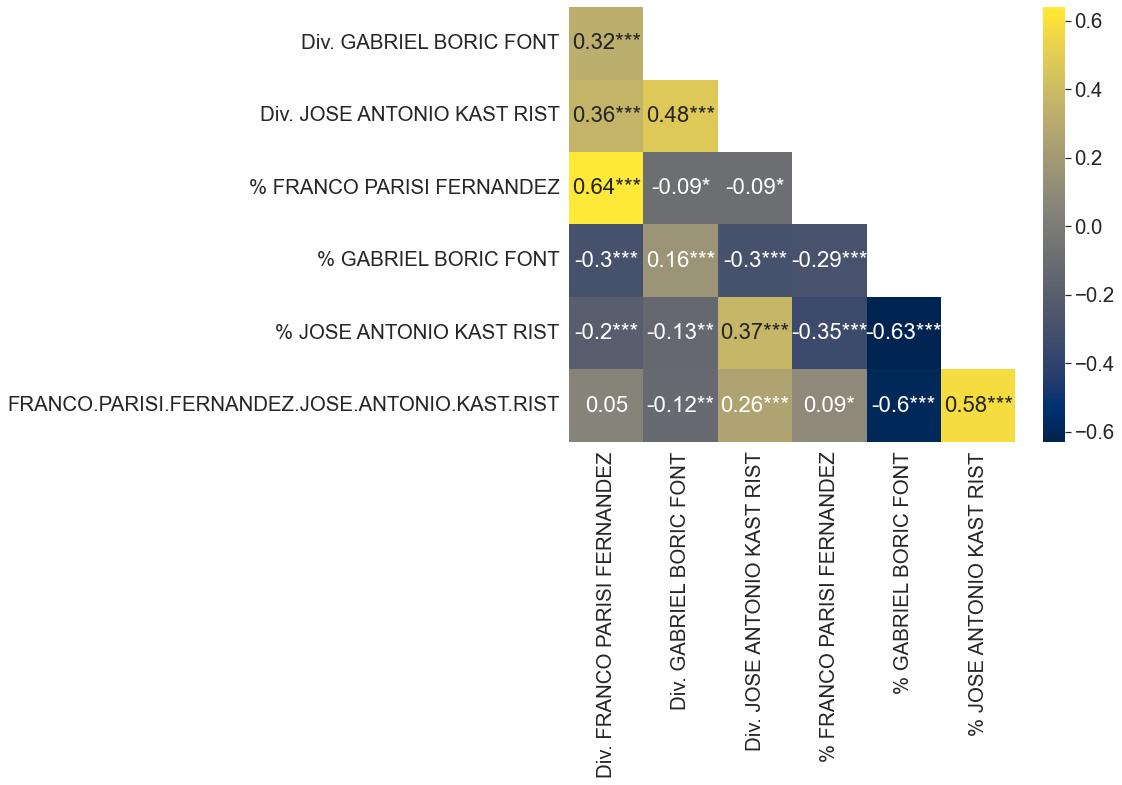

In [117]:
tbl = data.pivot(
    index=geography, 
    columns=["candidate"],
    values=["value", "rate"]
).reset_index()

def labels(x):
    if x[1] == "":
        return x[0]
    else:
        l = {"rate": "% ", "value": "Div. "}
    label = f"{l[x[0]]}{x[1]}"
    return label
tbl.columns = [labels(x) for x in list(tbl)]
tbl = pd.merge(tbl, df_transition[[geography, candidate_a]], on=geography)
m = tbl.corr()

sns.set_style("whitegrid")
sns.set(font_scale=1.85, rc={"figure.figsize": (10, 8)}, style="whitegrid")
matplotlib.rc("axes", edgecolor="#000000")
matplotlib.rcParams['axes.grid'] = False


corr_m = tbl.corr()
rho = tbl.corr()

pval = tbl.corr(method=lambda x, y: pearsonr(x, y)[1]) - np.eye(*rho.shape)
p = pval.applymap(lambda x: "".join(["*" for t in [0.01, 0.05, 0.1] if x<=t]))
p = rho.round(2).astype(str) + p

p = np.tril(p.values, k=-1)

p[p==0] = np.nan
p = pd.DataFrame(p).dropna(axis=0, how="all").dropna(axis=1, how="all")

# np.fill_diagonal(corr_m.values, np.nan)
labels_m = list(corr_m)
corr_m = np.tril(corr_m.values, k=-1)

corr_m[corr_m==0] = np.nan

heatmap_data = pd.DataFrame(corr_m, index=labels_m, columns=labels_m).round(2)\
                .dropna(axis=0, how="all")\
                .dropna(axis=1, how="all")

g = sns.heatmap(heatmap_data, annot=p, center=0, cmap="cividis", fmt="", cbar=True)

<AxesSubplot:xlabel='diff', ylabel='diff2'>

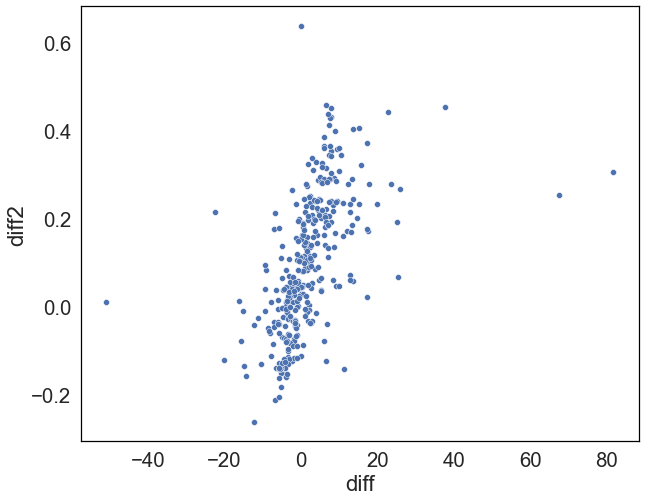

In [121]:
aa = data[data["candidate"] == candidates[1]]
bb = data[data["candidate"] == candidates[2]]

cc = pd.merge(aa, bb, on=geography)
cc["diff"] = cc["value_x"] - cc["value_y"]
cc["diff2"] = cc["rate_x"] - cc["rate_y"]

sns.scatterplot(x="diff", y="diff2", data=cc)

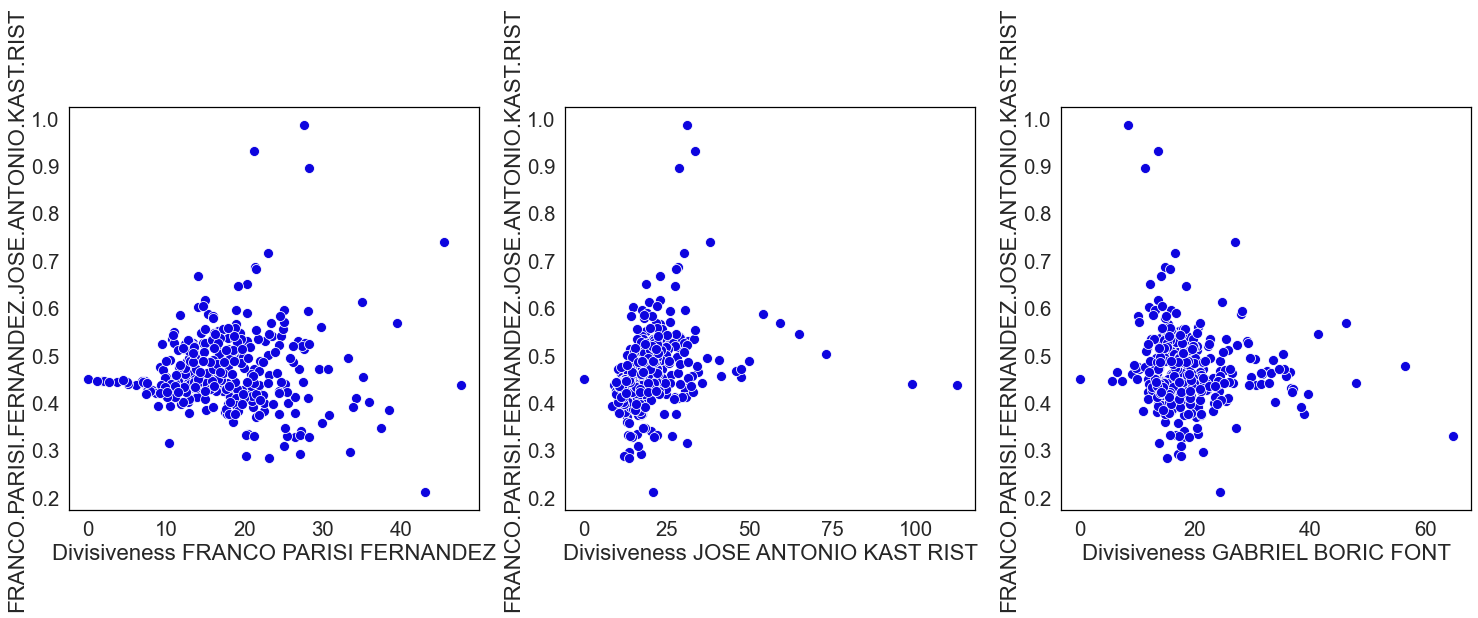

In [118]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(21, 7))

for idx, candidate in enumerate(candidates):
    g = sns.scatterplot(x="value", s=100, color="#0D04DF", y=candidate_a, data=data[data["candidate"] == candidate], ax=axs[idx])
    g.set_xlabel(f"Divisiveness {candidate}")
    
#     for x, tmp in data[data["candidate"] == candidate].iterrows():
#         g.text(tmp["value"], tmp[candidate_a], tmp[geography])

fig.tight_layout()